# 🔬 Sequence Comparison of DNA using `BioPython`
### 🦠 `Covid-19`, `SARS`, `MERS`, and `Ebola`  

#### Analysis Techniques:
* Compare their DNA sequence and Protein (Amino Acid) sequence
* GC Content
* Freq of Each Amino Acids
* Find similarity between them
  * Alignment
  * hamming distance
* 3D structure of each

| DNA Sequence     | Datasource                                                    |
|:-----------------|:--------------------------------------------------------------|
| Latest Sequence  | https://www.ncbi.nlm.nih.gov/genbank/sars-cov-2-seqs/         |
| Wuhan-Hu-1       | https://www.ncbi.nlm.nih.gov/nuccore/MN908947.3?report=fasta  |
| Covid19          | https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=fasta |
| SARS             | https://www.ncbi.nlm.nih.gov/nuccore/NC_004718.3?report=fasta |
| MERS             | https://www.ncbi.nlm.nih.gov/nuccore/NC_019843.3?report=fasta |
| EBOLA            | https://www.ncbi.nlm.nih.gov/nuccore/NC_002549.1?report=fasta |

### 1. Analysis Techniques

In [467]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [452]:
from Bio.Seq import Seq

# Create our sequence 
seq1 = Seq('ACTCGA')
seq2 = Seq('AC')


#### GC Contents In DNA  

* `GC-content` (or guanine-cytosine content) is the **percentage of nitrogenous bases** in a DNA or RNA molecule that are either guanine (`G`) or cytosine (`C`)

#### Usefulness  

* In polymerase chain reaction (PCR) experiments, the GC-content of short oligonucleotides known as primers is often used to predict their **annealing temperature** to the template DNA.
    * A `high` GC-content level indicates a relatively higher melting temperature.
    * DNA with `low` GC-content is less stable than DNA with high GC-content  

> Question: which sequence is more stable when heat is applied?

In [46]:
from Bio.SeqUtils import GC
# Check GC (guanine-cytosine) percentage in sequence

print(f"{GC(seq1) = }% \t({seq1})")
print(f"{GC(seq2) = }% \t({seq2})")

GC(seq1) = 50.0% 	(ACTCGA)
GC(seq2) = 50.0% 	(AC)


### Sequence Alignment
* `Global alignment` finds the best concordance/agreement between all characters in two sequences
* `Local Alignment` finds just the subsequences that align the best

In [103]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

print('seq1 =', seq1, '\nseq2 =', seq2, '\n\n')

# Global alignment
alignments = pairwise2.align.globalxx(seq1, seq2)

print(f'Alignments found: {len(alignments)}')
print(*alignments)

seq1 = ACTCGA 
seq2 = AC 

Alignments found: 2
('ACTCGA', 'A--C--', 2.0, 0, 6)
('ACTCGA', 'AC----', 2.0, 0, 6)


In [104]:
# Print nicely
print(format_alignment(*alignments[0]))

ACTCGA
|  |  
A--C--
  Score=2


In [105]:
# 2nd alignment
print(format_alignment(*alignments[1]))

ACTCGA
||    
AC----
  Score=2


In [106]:
# To see all possible alignments
for a in alignments:
    print(format_alignment(*a), '\n')

ACTCGA
|  |  
A--C--
  Score=2
 
ACTCGA
||    
AC----
  Score=2
 


In [107]:
# Get the number of possible sequence alignments
alignment_score = pairwise2.align.globalxx(seq1,seq2,one_alignment_only=True,score_only=True)
alignment_score

2.0

#### Sequence Similarity
* Fraction of nucleotides that is the same/ total number of nucleotides * 100%

In [108]:
alignment_score/len(seq1)*100

33.33333333333333

### Hamming Distance: `How Many Subsitutions are Required to Match Two Sequences?`

* Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different.
* In other words, it measures the minimum number of substitutions required to change one string into the other, or the minimum number of errors that could have transformed one string into the other
* It is used for error detection or error correction
* It is used to quantify the similarity of DNA sequences  

#### Edit Distance
   * Is a way of quantifying how dissimilar two strings (e.g., words) are to one another by counting the minimum number of operations required to transform one string into the other (e.g. Levenshtein distance)

In [109]:
def hamming_distance(lhs, rhs):
    return len([(x,y) for x,y in zip(lhs,rhs) if x != y])

In [133]:
hamming_distance('TT', 'ACCTA')

2

In [183]:
def hammer_time(s1, s2, verbose=True):
    """Take two nucleotide sequences s1 and s2, and display 
       the possible alignments and hamming distance.
    """
    if verbose:
        print('s1 =', s1, '\ns2 =', s2, '\n\n')
        print('Hamming Distance:', hamming_distance(s1, s2), '\n(min substitutions for sequences to match)')
        print('\nAlignment Options:\n\n')
    alignments = pairwise2.align.globalxx(s1, s2)
    for a in alignments:
        print(format_alignment(*a), '\n')
    

s1 = 'ACTCGAA'
s2 = 'ACGA'
hammer_time(s1, s2)

s1 = ACTCGAA 
s2 = ACGA 

Hamming Distance: 2 
(min substitutions for sequences to match)

Alignment Options:

ACTCGAA
|  || |
A--CG-A
  Score=4
 
ACTCGAA
||  | |
AC--G-A
  Score=4
 
ACTCGAA
|  ||| 
A--CGA-
  Score=4
 
ACTCGAA
||  || 
AC--GA-
  Score=4
 


### Dot Plot
* A dot plot is a graphical method that allows the **comparison of two biological sequences** and identify regions of **close similarity** between them.
* Simplest explanation: put a dot wherever sequences are identical

#### Usefulness
Dot plots can also be used to visually inspect sequences for
    - Direct or inverted repeats
    - Regions with low sequence complexity
    - Similar regions
    - Repeated sequences
    - Sequence rearrangements
    - RNA structures
    - Gene order

Acknowledgement: https://stackoverflow.com/questions/40822400/how-to-create-a-dotplot-of-two-dna-sequence-in-python

In [177]:
def delta(x,y):
    return 0 if x == y else 1

def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))

def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]

def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)

def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2) #experiment with character choice

In [178]:
# The dot plot: put a dot where the two sequences are identical

s1 = 'ACTCGA'
s2 = 'AC'

dotplot(s1, s2)

 |AC
----
A|■ 
C| ■
T|  
C| ■
G|  
A|■ 


In [199]:
#  Identical proteins will show a diagonal line.
s1 = 'ACCTAG'
s2 = 'ACCTAG'

dotplot(s1, s2)

print('\n\n')
hammer_time(s1, s2, verbose=False)

 |ACCTAG
--------
A|■   ■ 
C| ■■   
C| ■■   
T|   ■  
A|■   ■ 
G|     ■


ACCTAG
||||||
ACCTAG
  Score=6
 


# 🔬 2. Comparative Analysis of Virus DNA
### 🦠 `Covid-19`, `SARS`, `MERS`, `Ebola`  


* Covid19(`SARS-CoV2`) is a novel coronavirus identified as the cause of coronavirus disease 2019 (COVID-19) that began in Wuhan, China in late 2019 and spread worldwide.
* MERS(`MERS-CoV`) was identified in 2012 as the cause of Middle East respiratory syndrome (MERS).
* SARS(`SARS-CoV`) was identified in 2002 as the cause of an outbreak of severe acute respiratory syndrome (SARS).

#### `fasta` DNA Sequence Files
* Covid19 : https://www.rcsb.org/3d-view/6LU7
* SARS: https://www.ncbi.nlm.nih.gov/nuccore/NC_004718.3?report=fasta
* MERS: https://www.ncbi.nlm.nih.gov/nuccore/NC_019843.3?report=fasta
* EBOLA:https://www.rcsb.org/structure/6HS4

In [400]:
import pandas as pd
import numpy as np

covid = SeqIO.read("../data/01_COVID_MN908947.3.fasta","fasta")
mers = SeqIO.read("../data/02_MERS_NC_019843.3.fasta","fasta")
sars = SeqIO.read("../data/03_SARS_rcsb_pdb_5XES.fasta","fasta")
ebola = SeqIO.read("../data/04_EBOLA_rcsb_pdb_6HS4.fasta","fasta")

# Convert imports to BioPython sequences
covid_seq = covid.seq
mers_seq = mers.seq
sars_seq = sars.seq
ebola_seq = ebola.seq

# Create dataframe
df = pd.DataFrame({'name': ['COVID19', 'MERS', 'SARS', 'EBOLA'],
                   'seq': [covid_seq, mers_seq, sars_seq, ebola_seq]})
df

,name,seq
0,COVID19,"(A, T, T, A, A, A, G, G, T, T, T, A, T, A, C, ..."
1,MERS,"(G, A, T, T, T, A, A, G, T, G, A, A, T, A, G, ..."
2,SARS,"(A, T, A, T, T, A, G, G, T, T, T, T, T, A, C, ..."
3,EBOLA,"(C, G, G, A, C, A, C, A, C, A, A, A, A, A, G, ..."


#### Length of Each Genome

In [408]:
df['len'] = df.seq.apply(lambda x: len(x))

df[['name', 'len']].sort_values('len', ascending=False) \
                   .style.bar(color='#cde8F6', vmin=0, width=100, align='left')

,name,len
1,MERS,30119
0,COVID19,29903
2,SARS,29751
3,EBOLA,18959


* `MERS`, `COVID` and `SARS` all have about the same genome length (30,000 base pairs)

#### Which of them is more heat stable?

In [407]:
# Check the GC content
df['gc_content'] = df.seq.apply(lambda x: GC(x))

df[['name', 'gc_content']].sort_values('gc_content', ascending=False) \
                          .style.bar(color='#cde8F6', vmin=0)

,name,gc_content
1,MERS,41.236429
3,EBOLA,41.072841
2,SARS,40.761655
0,COVID19,37.972779


* `MERS` is the most stable with a GC of `41.24` followed by Ebola

#### Translate RNA into proteins 
How many proteins are in each dna sequence?

In [403]:
# Translate the RNA into Proteins
df['proteins'] = df.seq.apply(lambda s: len(s.translate()))

df[['name', 'proteins']].sort_values('proteins', ascending=False) \
                        .style.bar(color='#cde8F6', vmin=0)

,name,proteins
1,MERS,10039
0,COVID19,9967
2,SARS,9917
3,EBOLA,6319


#### How Many Amino Acids are Created?

In [404]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from collections import Counter

In [409]:
# Method 1
covid_analysed = ProteinAnalysis(str(covid_protein))
mers_analysed = ProteinAnalysis(str(mers_protein))
sars_analysed = ProteinAnalysis(str(sars_protein))
ebola_analysed = ProteinAnalysis(str(ebola_protein))

In [410]:
# Check for the Frequence of AA
covid_analysed.count_amino_acids()

{'A': 375,
 'C': 635,
 'D': 290,
 'E': 270,
 'F': 593,
 'G': 394,
 'H': 332,
 'I': 436,
 'K': 413,
 'L': 886,
 'M': 117,
 'N': 472,
 'P': 292,
 'Q': 325,
 'R': 558,
 'S': 810,
 'T': 679,
 'V': 548,
 'W': 263,
 'Y': 505}

In [430]:
# Method 2
from collections import Counter

# Find the Amino Acid Frequency
df['aa_freq'] = df.seq.apply(lambda s: Counter(s.translate()))
df

,name,seq,gc_content,proteins,len,aa_freq
0,COVID19,"(A, T, T, A, A, A, G, G, T, T, T, A, T, A, C, ...",37.972779,9967,29903,"{'I': 436, 'K': 413, 'G': 394, 'L': 886, 'Y': ..."
1,MERS,"(G, A, T, T, T, A, A, G, T, G, A, A, T, A, G, ...",41.236429,10039,30119,"{'D': 121, 'L': 1711, 'S': 852, 'E': 157, '*':..."
2,SARS,"(A, T, A, T, T, A, G, G, T, T, T, T, T, A, C, ...",40.761655,9917,29751,"{'I': 566, 'L': 1368, 'G': 438, 'F': 437, 'Y':..."
3,EBOLA,"(C, G, G, A, C, A, C, A, C, A, A, A, A, A, G, ...",41.072841,6319,18959,"{'R': 437, 'T': 384, 'H': 235, 'K': 344, 'E': ..."


#### Most Common Amino Acid

In [433]:
# For Covid
df[df.name=='COVID19'].aa_freq.values[0].most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

<BarContainer object of 21 artists>

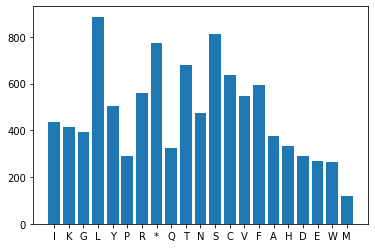

In [432]:
# Plot the Amino Acids

aa = df[df.name=='COVID19'].aa_freq.values[0]
plt.bar(aa.keys(), aa.values())

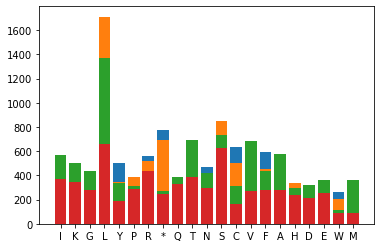

In [448]:
for virus in df.name:
    aa = df[df.name==virus].aa_freq.values[0]
    plt.bar(aa.keys(), aa.values())
plt.show()

### Dot Plots

In [460]:
# Compare Covid and Mers
dotplot(covid_seq[0:10],mers_seq[0:10])

 |GATTTAAGTG
------------
A| ■   ■■   
T|  ■■■   ■ 
T|  ■■■   ■ 
A| ■   ■■   
A| ■   ■■   
A| ■   ■■   
G|■      ■ ■
G|■      ■ ■
T|  ■■■   ■ 
T|  ■■■   ■ 


In [458]:
# Compare Covid and sars
n = 100
dotplot(covid_seq[0:n],sars_seq[0:n])

 |ATATTAGGTT
------------
A|■ ■  ■    
T| ■ ■■   ■■
T| ■ ■■   ■■
A|■ ■  ■    
A|■ ■  ■    
A|■ ■  ■    
G|      ■■  
G|      ■■  
T| ■ ■■   ■■
T| ■ ■■   ■■


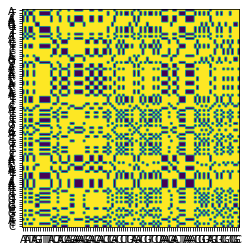

In [472]:
# Plotting function
def dotplotx(seq1, seq2, n):
    seq1=seq1[0:n]
    seq2=seq2[0:n]
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    # on x-axis list all sequences of seq 2
    xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
    # on y-axis list all sequences of seq 1
    yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
    plt.show()
    
dotplotx(covid_seq, sars_seq, n=100)

Notice the large diagonal line for the second half of the first 100 nucleotides - indicating these are the same for `COVID19` and `SARS`

In [461]:
# Pairwise alignment for the first 100 nucleotide
cov_n_sars = pairwise2.align.globalxx(covid_seq[0:100],sars_seq[0:100],one_alignment_only=True,score_only=True)

cov_n_sars

89.0

In [466]:

# Plot 
plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
plt.show()

AttributeError: module 'matplotlib' has no attribute 'imshow'